# Import Required Libraries
Import the necessary libraries, including pandas and matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Load CSV File
Use pandas to load the CSV file into a DataFrame.

Note: The max ADC value from the as7341 sensor is: 65535

WARNING: Remember to edit the time window of the display data below

In [2]:
import ssl
import requests
import io

# Load CSV File with approximately 43 lines of non-csv metadata
startParsingAtLine = 43 #Normally 43

# Load the CSV file into a DataFrame
url = 'https://github.com/jongarrison/marine_sciences_data/raw/refs/heads/main/kdupro/2025-04-16_disco_bay/2025-04-16_discobay_submerged.txt'

response = requests.get(url)

print(f"Received response code: {response.status_code}")

print(f"Text:\n{response.text[:1500]}")  # Print the first 1000 characters of the response text

Received response code: 200
Text:
METADATA
initial_wait_s: 30
measures: 1
period_ms: 1000
depth: 0.5
name: kdupro01
buoy: 0
country: usa
place: discobay
maker: udea
curator: icm-csic
email: rodero@icm.csic.es
sensors: as7341
description: calibration
units: counts,
latitude: 41.383189
longitude: 2.197949
altitude: 0
ref_coord_system: wgs84
location_source: gnss
time_source: internet
processing_level: 0
processing_procedure: https://git.csic.es/kduino/kdupro
processing_version: build
processing_revision: 0
calibration_procedure: https://git.csic.es/kduino/kdupro
calibration_reference: 0
calibration_time: 0
calibration_version: 0
sensor_id: 
platform_id: 
deployment_id: 
sample_id: 
observer_id: 
owner_contact: jpiera@icm.csic.es
operator_contact: rodero@icm.csic.es
license: mit
license_reference: https://opensource.org/licenses/mit
embargo_date: 
datetime: yyyy-mm-ddthh:mm:ssz
time: 
2025-04-16T09:21:36:041Z
DATA
TIME F1-415nm F2-445nm F3-480nm F4-515nm F5-555nm F6-590nm F7-630nm F8-680n

In [3]:

df = pd.read_csv(io.StringIO(response.text), header=0, skiprows=startParsingAtLine, skip_blank_lines=True, sep=" ")

display(HTML("<h1>HEAD</h1>"))
# Display the first few rows of the DataFrame without wrapping columns
display(HTML(df.head().to_html()))

display(HTML("<h1>TAIL</h1>"))
display(HTML(df.tail().to_html()))

display(HTML("<h1>Describe</h1>"))
# Display summary statistics of the DataFrame

display(HTML(df.describe().to_html()))

display(HTML("<h1>Data Types</h1>"))
# Display data types of the DataFrame
print(df.dtypes)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

,TIME,F1-415nm,F2-445nm,F3-480nm,F4-515nm,F5-555nm,F6-590nm,F7-630nm,F8-680nm,Clear,Near-IR
0,2025-04-16T09:21:38:052Z,162,279,391,511,535,643,832,880,2880,1374
1,2025-04-16T09:21:39:053Z,192,330,465,603,676,803,1046,1126,3730,1714
2,2025-04-16T09:21:40:053Z,172,287,414,522,647,771,1003,1072,3594,1663
3,2025-04-16T09:21:41:052Z,176,296,424,541,600,719,933,993,3307,1549
4,2025-04-16T09:21:42:053Z,170,290,408,529,553,667,863,906,3114,1455


,TIME,F1-415nm,F2-445nm,F3-480nm,F4-515nm,F5-555nm,F6-590nm,F7-630nm,F8-680nm,Clear,Near-IR
1926,2025-04-16T11:17:01:079Z,50601,50601,50601,50601,50601,50601,50601,50601,50601,50601
1927,2025-04-16T11:17:02:079Z,25756,30539,40539,42386,50601,45338,50601,50601,50601,50601
1928,2025-04-16T11:17:03:079Z,26934,35119,47043,49434,50517,40945,50601,50601,50601,50601
1929,2025-04-16T11:17:04:079Z,29721,38932,50601,50601,50601,48457,50601,50601,50601,50601
1930,2025-04-16T11:17:05:079Z,26137,32892,42568,46053,46199,38837,50601,50601,50601,50601


,F1-415nm,F2-445nm,F3-480nm,F4-515nm,F5-555nm,F6-590nm,F7-630nm,F8-680nm,Clear,Near-IR
count,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000
mean,19581.368203,22780.631797,29580.929052,33915.812015,38412.707923,39076.318488,37163.050751,34052.053858,44121.415847,26781.922838
std,18284.397691,18785.283783,20425.566447,19536.449896,17782.414836,17515.214508,18534.977830,20245.084824,15007.072495,20797.312238
min,91.000000,169.000000,230.000000,314.000000,359.000000,449.000000,583.000000,574.000000,2268.000000,995.000000
25%,2242.500000,2683.000000,6953.500000,15051.000000,29201.000000,30705.000000,22711.000000,11072.500000,50601.000000,5416.000000
50%,13599.000000,20978.000000,36103.000000,49064.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,23744.000000
75%,33915.000000,41713.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000
max,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000,50601.000000


TIME        object
F1-415nm     int64
F2-445nm     int64
F3-480nm     int64
F4-515nm     int64
F5-555nm     int64
F6-590nm     int64
F7-630nm     int64
F8-680nm     int64
Clear        int64
Near-IR      int64
dtype: object
Missing values in each column:
 TIME        0
F1-415nm    0
F2-445nm    0
F3-480nm    0
F4-515nm    0
F5-555nm    0
F6-590nm    0
F7-630nm    0
F8-680nm    0
Clear       0
Near-IR     0
dtype: int64


# Data Visualization
Use matplotlib to visualize the data (e.g., line plots, histograms).

                       TIME  F1-415nm  F2-445nm  F3-480nm  F4-515nm  F5-555nm  \
0  2025-04-16T09:21:38:052Z       162       279       391       511       535   
1  2025-04-16T09:21:39:053Z       192       330       465       603       676   
2  2025-04-16T09:21:40:053Z       172       287       414       522       647   
3  2025-04-16T09:21:41:052Z       176       296       424       541       600   
4  2025-04-16T09:21:42:053Z       170       290       408       529       553   

   F6-590nm  F7-630nm  F8-680nm  Clear  Near-IR  
0       643       832       880   2880     1374  
1       803      1046      1126   3730     1714  
2       771      1003      1072   3594     1663  
3       719       933       993   3307     1549  
4       667       863       906   3114     1455  


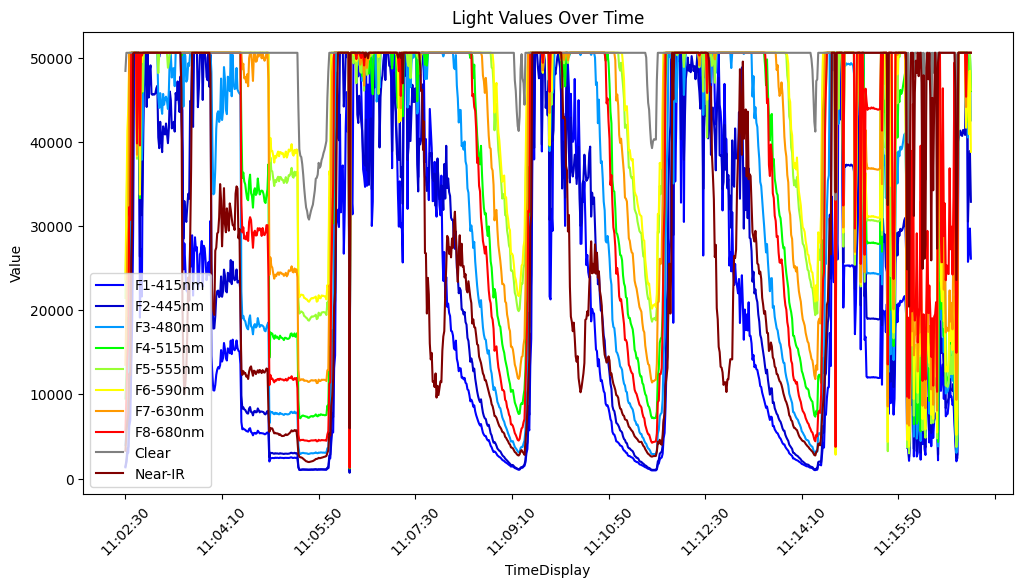

In [4]:
# Dictionary of the df column names as keys and the pandas rgb value associated with the mentioned wavelength of light:
color_dict = {
    'F1-415nm': '#0000FF',  # Blue
    'F2-445nm': '#0000CC',  # Dark Blue
    'F3-480nm': '#0099FF',  # Light Blue
    'F4-515nm': '#00FF00',  # Green
    'F5-555nm': '#99FF33',  # Light Green
    'F6-590nm': '#FFFF00',  # Yellow
    'F7-630nm': '#FF9900',  # Orange
    'F8-680nm': '#FF0000',  # Red
    'Clear': '#808080',     # Gray
    'Near-IR': '#800000'    # Maroon
}

print(df.head())

# Convert the TIME column to a standard timestamp format
#df['TimeStandard'] = pd.to_datetime(df['TIME'], format='%Y-%m-%dT%H:%M:%S:%fZ')
df['TimeStandard'] = pd.to_datetime(df['TIME'], format='%Y-%m-%dT%H:%M:%S:%fZ')

# Convert the TIME column to datetime format and create a new column with a more readable format
df['TimeDisplay'] = pd.to_datetime(df['TimeStandard']).dt.strftime('%H:%M:%S')

# Manually trim the rows to TimeDisplay values between start and end times
dfplot = df[(df['TimeDisplay'] >= '11:02:30') & (df['TimeDisplay'] <= '11:18:00')]


# Line plot for the first column (assuming it's a timestamp)
plt.figure(figsize=(12, 6))

# colNamesToPlot = ["Clear", "F7-630nm", "F8-680nm"]
# colNamesToPlot = ["Clear"]
colNamesToPlot = ["F1-415nm", "F2-445nm", "F3-480nm", "F4-515nm", "F5-555nm", "F6-590nm", "F7-630nm", "F8-680nm", "Clear", "Near-IR"]

for colName in colNamesToPlot:
    plt.plot(dfplot["TimeDisplay"], dfplot[colName], label=colName, color=color_dict[colName])

plt.xlabel('TimeDisplay')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

plt.ylabel('Value')
plt.title('Light Values Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [5]:
def find_below_average_regions(df, column, time_column, min_time_width):
    """
    Find regions where a column's values are below the average for a minimum time width.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column to analyze.
        time_column (str): The column containing timestamps.
        min_time_width (str): Minimum time width for a region (e.g., '30s', '5min').

    Returns:
        list: A list of tuples (start_time, end_time) for regions below the average.
    """
    # Ensure the time column is in datetime format
    df[time_column] = pd.to_datetime(df[time_column])

    # Calculate the average of the column
    column_mean = df[column].mean()

    # Create a boolean mask for values below the average
    below_avg_mask = df[column] < column_mean

    # Group consecutive below-average values
    df['Group'] = (below_avg_mask != below_avg_mask.shift()).cumsum()
    below_avg_groups = df[below_avg_mask].groupby('Group')

    # Find regions where the time width exceeds the minimum threshold
    regions = []
    for _, group in below_avg_groups:
        start_time = group[time_column].iloc[0]
        end_time = group[time_column].iloc[-1]
        time_width = end_time - start_time

        # Check if the time width exceeds the minimum threshold
        if time_width >= pd.to_timedelta(min_time_width):
            regions.append((start_time, end_time))

    # Drop the temporary 'Group' column
    df.drop(columns=['Group'], inplace=True)

    return regions

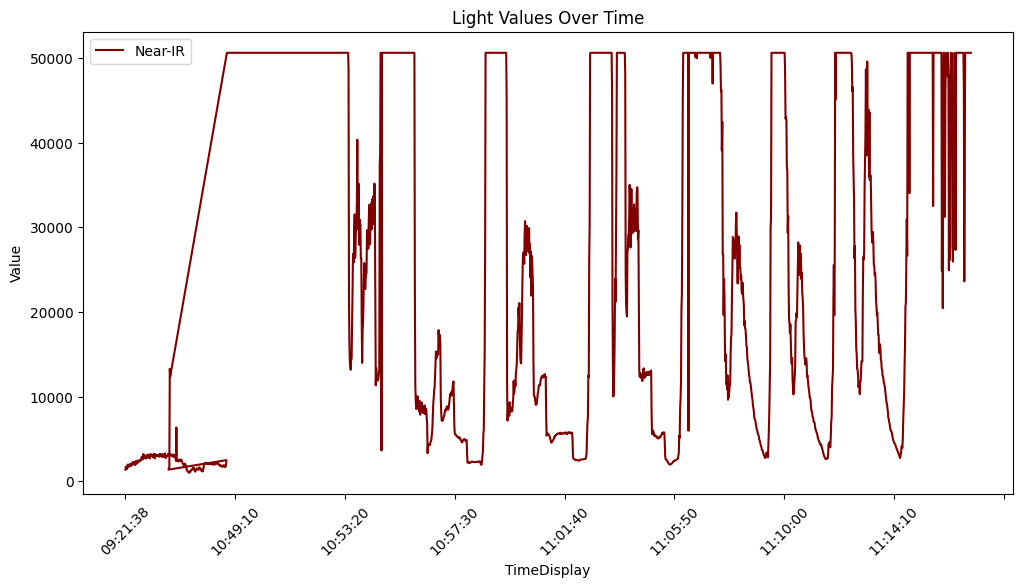

In [6]:

# Line plot for the first column (assuming it's a timestamp)
plt.figure(figsize=(12, 6))

# for colName in colNamesToPlot:
#     plt.plot(df["TimeDisplay"], df[colName], label=colName, color=color_dict[colName])


# Create new dataframe

# Create a new empty dataframe
dfid = pd.DataFrame()
dfid["TimeDisplay"] = df["TimeDisplay"]

rollingColNames = []
# for colName in colNamesToPlot:
#     # Create a new column name for the rolling average
#     rollingColName = colName + "_Moving_Avg"
#     dfid[colName] = df[colName].rolling(window=30).mean()
#     plt.plot(df["TimeDisplay"], df[colName], label=colName, color=color_dict[colName])


colName = "Near-IR"
plt.plot(df["TimeDisplay"], df[colName], label=colName, color=color_dict[colName])

colNamesToAverage = ["F1-415nm", "F2-445nm", "F3-480nm", "F4-515nm", "F5-555nm", "F6-590nm", "F7-630nm", "F8-680nm"]

# df["avg"] = df[colNamesToPlot].mean(axis=1)
# plt.plot(df["TimeDisplay"], df["avg"], label="Average", color="black", linestyle='--')

plt.xlabel('TimeDisplay')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

plt.ylabel('Value')
plt.title('Light Values Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()


